In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [4]:
#With discharge
file_path = rf"./seed_6697/y_obs.csv"
y_obs = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_obs.set_index(y_obs.columns[0],inplace=True)
file_path = rf"./seed_average/y_sim.csv"
y_sim = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim.set_index(y_sim.columns[0],inplace=True)
file_path = rf"../without_discharge_haicore/seed_average/y_sim.csv"
y_sim_no_disch = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim_no_disch.set_index(y_sim_no_disch.columns[0],inplace=True)


In [6]:
y_sim_no_disch

GRDC_6140100  GRDC_6140101  GRDC_6140120  GRDC_6140130  \
Unnamed: 0                                                           
2006-01-01      2.514085      2.790045      4.182065      1.416093   
2006-01-02      5.003581      4.690950      5.784280      3.326606   
2006-01-03      5.902438      5.837746      8.748884      5.206750   
2006-01-04      1.703534      1.618903      1.459141      1.246972   
2006-01-05      1.330524      1.155336      1.106472      0.933089   
...                  ...           ...           ...           ...   
2020-12-27      0.258007      0.255525      0.330836      0.341814   
2020-12-28      1.823745      1.794728      1.405426      2.839641   
2020-12-29      1.717882      1.775822      0.663994      1.688490   
2020-12-30      0.690290      0.755344      0.433006      0.537622   
2020-12-31      0.260950      0.273203      0.291292      0.291803   

            GRDC_6140140  GRDC_6140150  GRDC_6140250  GRDC_6140280  \
Unnamed: 0                                                           
2006-01-01      1.282595      1.744491      0.944564      0.883996   
2006-01-02      3.183206      9.437256      2.067951      0.589465   
2006-01-03      5.197178      7.825683      2.548305      0.786463   
2006-01-04      1.248472      1.641246      1.181090      0.941168   
2006-01-05      0.751666      1.415423      0.740655      0.750002   
...                  ...           ...           ...           ...   
2020-12-27      0.356550      0.293134      0.234559      0.265432   
2020-12-28      2.468406      2.856632      2.577503      3.200076   
2020-12-29      1.353314      0.624765      0.826010      1.171715   
2020-12-30      0.441540      0.352579      0.363052      0.459667   
2020-12-31      0.282861      0.406074      0.547749      0.982001   

            GRDC_6140300  GRDC_6140400  ...  camelsgb_9003  camelsgb_9004  \
Unnamed: 0                              ...                                 
2006-01-01      1.835059      2.044525  ...       2.664707       1.992566   
2006-01-02      8.504736      4.907638  ...       2.701651       2.071862   
2006-01-03      7.319341      5.664354  ...       1.738638       1.457265   
2006-01-04      1.584903      1.180411  ...       0.628743       0.518806   
2006-01-05      1.249685      0.795886  ...       0.711943       1.201144   
...                  ...           ...  ...            ...            ...   
2020-12-27      0.283135      0.112530  ...       1.423860       1.615661   
2020-12-28      2.721457      2.126059  ...       2.246890       2.561636   
2020-12-29      0.650264      0.772406  ...       5.532336       4.021469   
2020-12-30      0.358297      0.302823  ...       1.356930       1.040325   
2020-12-31      0.390219      0.257406  ...      10.263197      10.111558   

            camelsgb_92001  camelsgb_93001  camelsgb_94001  camelsgb_95001  \
Unnamed: 0                                                                   
2006-01-01        1.344150        0.834146        1.129662        1.248027   
2006-01-02        9.076642        3.010877        2.981183        1.968514   
2006-01-03        3.512440        3.250966        3.315790        3.166441   
2006-01-04        1.346731        1.092936        1.231980        1.116181   
2006-01-05        0.774708        0.373228        0.389356        0.321277   
...                    ...             ...             ...             ...   
2020-12-27       10.475968        9.126836        8.903329        6.440536   
2020-12-28        4.904043        5.793211        5.872048        3.006169   
2020-12-29        3.093347        5.392471        5.852037        4.738751   
2020-12-30        2.885880        7.291486        7.276492        6.795611   
2020-12-31        3.629136        4.550868        4.724953        4.465977   

            camelsgb_96001  camelsgb_96002  camelsgb_96004  camelsgb_97002  
Unnamed: 0                                                                  
2006-01-01        1

In [7]:
#Updated NSE Calculations
import pandas as pd
import numpy as np

def calculate_nse(y_obs_df, y_sim_df):
    """Calculate NSE for each catchment while handling NaN values."""
    nse_values = []

    for catchment in y_obs_df.columns:
        # Read values
        y_obs = y_obs_df[catchment].values
        y_sim = y_sim_df[catchment].values

        # Mask NaN values from y_sim
        mask_y_sim = ~np.isnan(y_sim)
        y_sim = y_sim[mask_y_sim]
        y_obs = y_obs[mask_y_sim]

        # Mask NaN values from y_obs
        mask_y_obs = ~np.isnan(y_obs)
        y_sim = y_sim[mask_y_obs]
        y_obs = y_obs[mask_y_obs]

        # Calculate NSE
        if y_sim.size > 180 and y_obs.size > 180:
            nse = 1.0 - np.sum((y_sim - y_obs)**2) / np.sum((y_obs - np.mean(y_obs))**2)
            nse = round(nse, 3)  # Round to two decimals
        else:
            nse = np.nan

        nse_values.append(nse)

    return pd.DataFrame({'Catchment': y_obs_df.columns, 'NSE': nse_values})

In [8]:
nse_disch = calculate_nse(y_obs, y_sim)
nse_without_disch = calculate_nse(y_obs, y_sim_no_disch)

In [10]:
nse_without_disch

Catchment    NSE
0       GRDC_6140100  0.474
1       GRDC_6140101  0.494
2       GRDC_6140120  0.500
3       GRDC_6140130  0.504
4       GRDC_6140140  0.499
...              ...    ...
1795  camelsgb_95001  0.614
1796  camelsgb_96001  0.626
1797  camelsgb_96002  0.641
1798  camelsgb_96004  0.608
1799  camelsgb_97002  0.598

[1800 rows x 2 columns]

In [11]:
nse_disch

Catchment    NSE
0       GRDC_6140100  0.695
1       GRDC_6140101  0.741
2       GRDC_6140120  0.706
3       GRDC_6140130  0.730
4       GRDC_6140140  0.725
...              ...    ...
1795  camelsgb_95001  0.669
1796  camelsgb_96001  0.710
1797  camelsgb_96002  0.719
1798  camelsgb_96004  0.680
1799  camelsgb_97002  0.763

[1800 rows x 2 columns]

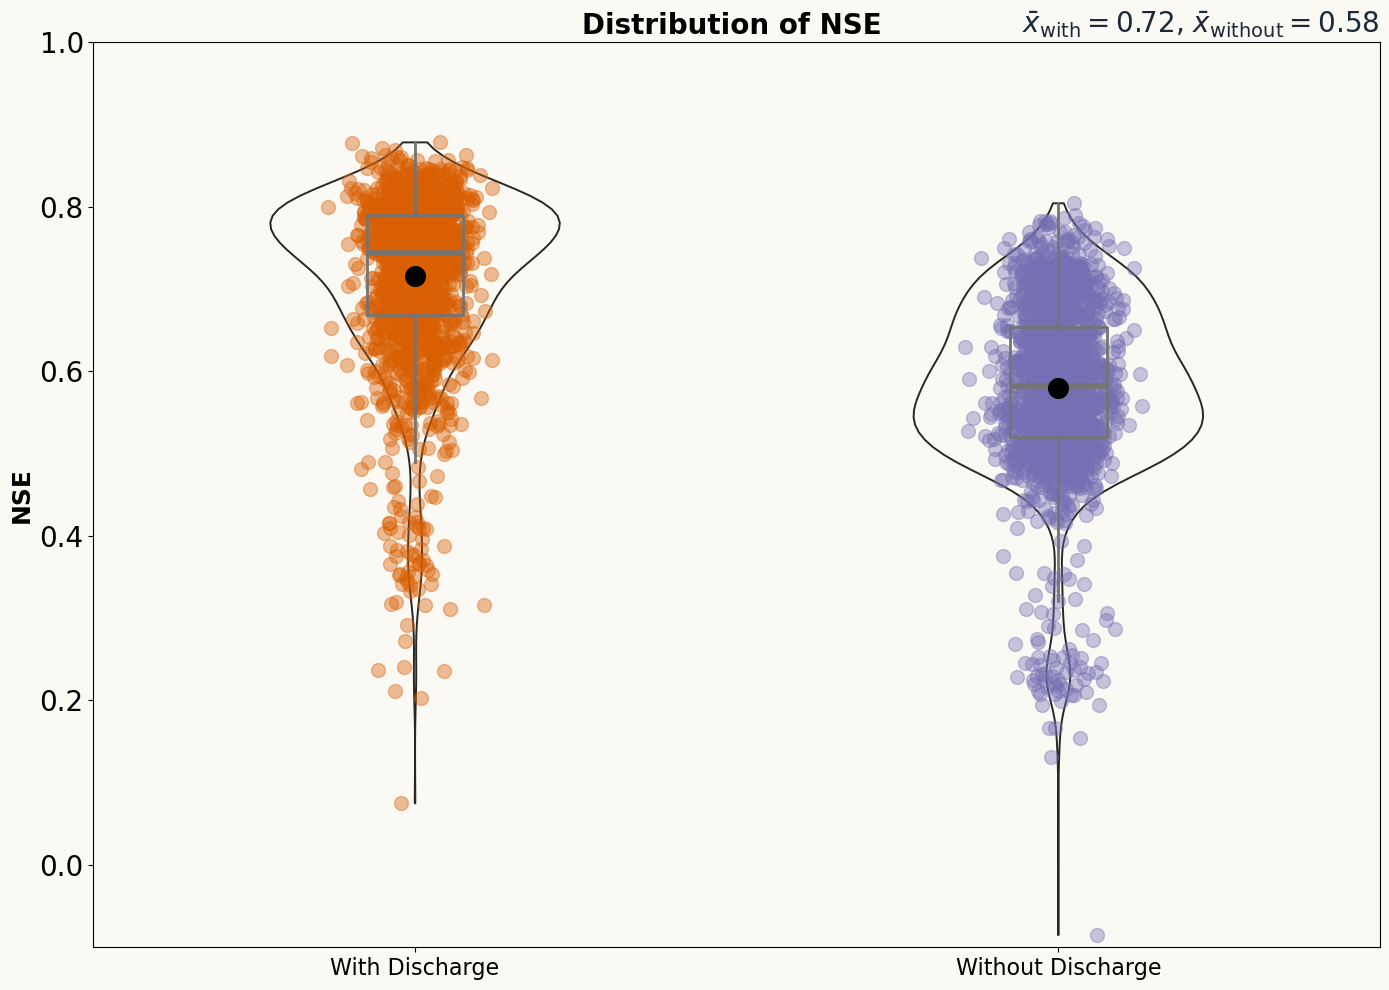

In [13]:
# Define colors and layout constants
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"
POSITIONS = [1, 2]  # Positions for the violin plots
HLINES = np.arange(-0.5, 1.1, 0.1)  # Horizontal lines for reference

nse_disch_values = nse_disch['NSE'].dropna()
nse_without_disch_values = nse_without_disch['NSE'].dropna()

#nse_disch_values = nse_disch_values[nse_disch_values >= 0]  # Keep only non-negative values
#nse_without_disch_values = nse_without_disch_values[nse_without_disch_values >= 0]  # Keep only non-negative values

# Data for plotting
y_data = [nse_disch_values, nse_without_disch_values]
x_jittered = [np.random.normal(pos, 0.04, size=len(y)) for pos, y in zip(POSITIONS, y_data)]

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = [ "#D95F02", "#7570B3"]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)


# Add violins
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

# Add boxplots
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers=False,  # Do not show the outliers beyond the caps
    showcaps=False,    # Do not show the caps
    medianprops=medianprops,
    whiskerprops=boxprops,
    boxprops=boxprops
)

# Add jittered dots
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s=100, color=color, alpha=0.4)

# Calculate and plot the mean
means = [np.mean(y) for y in y_data]

# Plot the means as red circles
ax.scatter(POSITIONS, means, color='black', s=200, zorder=3, label='Mean')


# Customize labels
ax.set_xticks(POSITIONS)
ax.tick_params(axis='both', labelsize=20)
ax.set_xticklabels(['With Discharge', 'Without Discharge'], size=16)
ax.set_ylabel('NSE', size=18, weight='bold')
ax.set_ylim([-0.1,1])
ax.set_title('Distribution of NSE ', size=20, weight='bold')

# Subtitle
subtitle_stats = [
    r"$\bar{x}_{\rm{with}}=%.2f$" % np.mean(nse_disch_values),
    r"$\bar{x}_{\rm{without}}=%.2f$" % np.mean(nse_without_disch_values)
]

ax.set_title(
    ", ".join(subtitle_stats),
    loc="right",
    ha="right",
    fontsize=20,
    color=BLUE_DARK
)

# Adjust layout
plt.tight_layout()
plt.savefig('violin_plot.jpeg', dpi =1200)
plt.show()


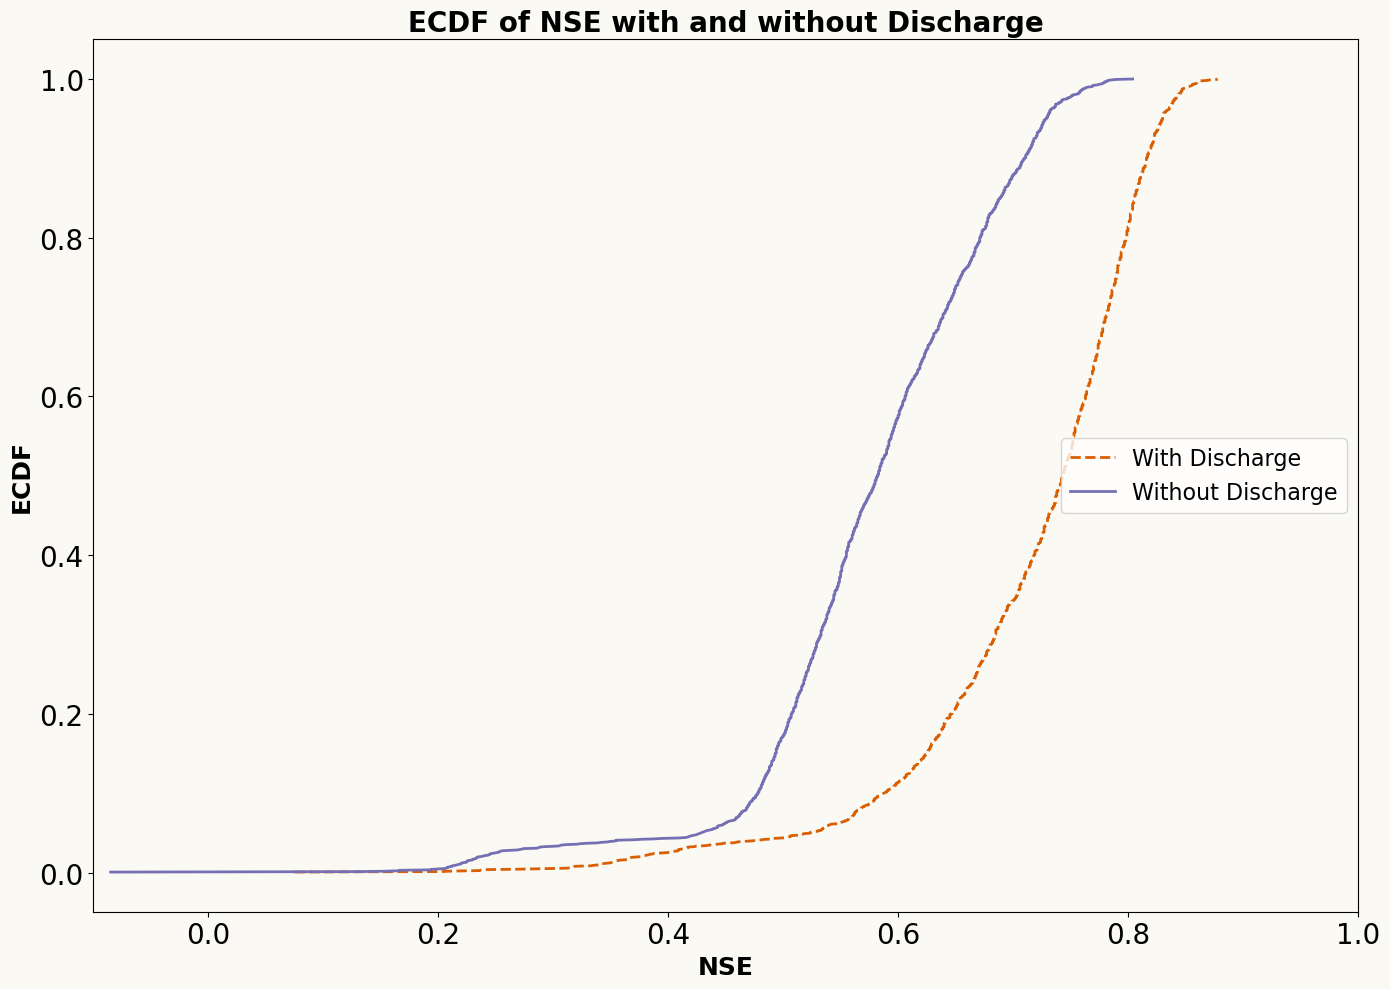

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

# Define colors and layout constants
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

COLOR_SCALE = [ "#D95F02", "#7570B3"]

def plot_ecdf(nse_disch, nse_without_disch):
    # Extract and clean NSE column from both dataframes, removing NaN and negative values
    nse_disch_values = nse_disch['NSE'].dropna()
    #nse_disch_values = nse_disch_values[nse_disch_values >= 0]  # Keep only non-negative values

    nse_without_disch_values = nse_without_disch['NSE'].dropna()
    #nse_without_disch_values = nse_without_disch_values[nse_without_disch_values >= 0]  # Keep only non-negative values

    # Calculate the ECDF using statsmodels
    ecdf_disch = ECDF(nse_disch_values)
    ecdf_without_disch = ECDF(nse_without_disch_values)

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 10))

    # Background color
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)


    # Plot ECDF for nse_disch
    ax.plot(ecdf_disch.x, ecdf_disch.y, label='With Discharge', color="#D95F02", lw=2,linestyle='dashed')

    # Plot ECDF for nse_without_disch
    ax.plot(ecdf_without_disch.x, ecdf_without_disch.y, label='Without Discharge', color="#7570B3", lw=2)

    # Add labels and legend
    ax.set_xlabel('NSE', size=18, weight='bold')
    ax.tick_params(axis='both', labelsize=16)
    ax.set_xlim([-0.1, 1])  # Limit x-axis to range 0 to 1
    ax.set_ylabel('ECDF', size=18, weight='bold')
    ax.set_title('ECDF of NSE with and without Discharge', size=20, weight='bold')
    ax.legend(loc='center right', fontsize=16)

    # Increase the font size of the ticks
    ax.tick_params(axis='both', which='major', labelsize=20)  # Set font size for both axes

    # Adjust layout
    # Adjust layout
    plt.tight_layout()
    plt.savefig('ecdf_plot.jpeg', dpi =1200)
    plt.show()


plot_ecdf(nse_disch, nse_without_disch)


In [16]:
# Assuming nse_without_disch and nse_disch are your input dataframes
# Merge the two dataframes on 'basin_id'
merged_df = pd.merge(nse_without_disch, nse_disch, on='Catchment', suffixes=('_without_disch', '_disch'))

# Calculate the difference between the two NSE columns
merged_df['NSE_difference'] =  merged_df['NSE_disch'] - merged_df['NSE_without_disch'] 


# Display the result
print(merged_df)

           Catchment  NSE_without_disch  NSE_disch  NSE_difference
0       GRDC_6140100              0.474      0.695           0.221
1       GRDC_6140101              0.494      0.741           0.247
2       GRDC_6140120              0.500      0.706           0.206
3       GRDC_6140130              0.504      0.730           0.226
4       GRDC_6140140              0.499      0.725           0.226
...              ...                ...        ...             ...
1795  camelsgb_95001              0.614      0.669           0.055
1796  camelsgb_96001              0.626      0.710           0.084
1797  camelsgb_96002              0.641      0.719           0.078
1798  camelsgb_96004              0.608      0.680           0.072
1799  camelsgb_97002              0.598      0.763           0.165

[1800 rows x 4 columns]


In [17]:
merged_df.to_csv("result_NSE_differences.csv")

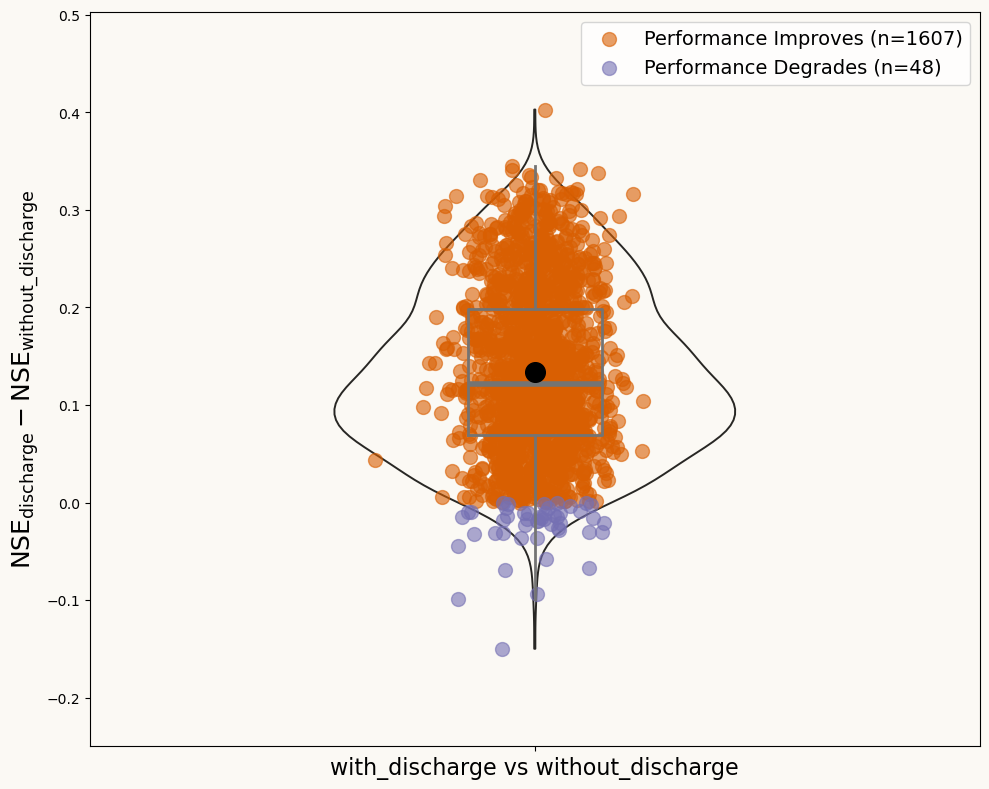

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define colors and layout constants
BG_WHITE = "#fbf9f4"
GREY_DARK = "#747473"
BLACK = "#282724"
COLOR_POSITIVE = "#D95F02" 
COLOR_NEGATIVE = "#7570B3" 
POSITION = [1]  # Single violin plot position


# Extract data
nse_difference = merged_df['NSE_difference'].dropna()

# Split data into positive and negative
positive_values = nse_difference[nse_difference >= 0]
negative_values = nse_difference[nse_difference < 0]
# Count the number of points in each category
num_positive = len(positive_values)
num_negative = len(negative_values)


# Generate jittered x-values for each group
x_jittered_positive = np.random.normal(POSITION[0], 0.04, size=len(positive_values))
x_jittered_negative = np.random.normal(POSITION[0], 0.04, size=len(negative_values))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

# Violin plot
violins = ax.violinplot(
    [nse_difference],  
    positions=POSITION,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violin appearance
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

# Boxplot (optional)
medianprops = dict(linewidth=4, color=GREY_DARK, solid_capstyle="butt")
boxprops = dict(linewidth=2, color=GREY_DARK)

ax.boxplot(
    [nse_difference],
    positions=POSITION, 
    showfliers=False, 
    showcaps=False, 
    medianprops=medianprops,
    whiskerprops=boxprops,
    boxprops=boxprops
)

# Scatter points with color distinction
ax.scatter(x_jittered_positive, positive_values, s=100, color=COLOR_POSITIVE, alpha=0.6, label=f"Performance Improves (n={num_positive})") 
ax.scatter(x_jittered_negative, negative_values, s=100, color=COLOR_NEGATIVE, alpha=0.6, label=f"Performance Degrades (n={num_negative})")

# Mean value
mean_value = np.mean(nse_difference)
ax.scatter(POSITION, [mean_value], color='black', s=200, zorder=3)

# Labels & Titles
ax.set_xticks(POSITION)
ax.set_xticklabels(['with_discharge vs without_discharge'], size=16)
ax.set_ylabel(r'$\text{NSE}_{\text{discharge}} - \text{NSE}_{\text{without_discharge}} $', size=18, weight='bold')
ax.set_ylim([min(nse_difference) - 0.1, max(nse_difference) + 0.1])


# Add legend
ax.legend(loc="upper right", fontsize=14)

# Adjust layout & save
plt.tight_layout()
plt.savefig('violin_plot_nse_difference_colored.jpeg', dpi=1200)
plt.show()


In [19]:
def calculate_nse_thresholds(y_obs_df, y_sim_df):
    """Calculate NSE for each catchment with thresholds >1 and >5."""
    nse1_values = []
    nse5_values = []

    for catchment in y_obs_df.columns:
        y_obs = y_obs_df[catchment].values
        y_sim = y_sim_df[catchment].values

        # Mask NaN values
        valid_mask = ~np.isnan(y_obs) & ~np.isnan(y_sim)
        y_obs = y_obs[valid_mask]
        y_sim = y_sim[valid_mask]

        # NSE for values > 1
        mask_gt1 = (y_obs > 1) & (y_sim > 1)
        if np.sum(mask_gt1) > 180:
            obs1 = y_obs[mask_gt1]
            sim1 = y_sim[mask_gt1]
            nse1 = 1 - np.sum((sim1 - obs1)**2) / np.sum((obs1 - np.mean(obs1))**2)
            nse1 = round(nse1, 3)
        else:
            nse1 = np.nan

        # NSE for values > 5
        mask_gt5 = (y_obs > 5) & (y_sim > 5)
        if np.sum(mask_gt5) > 180:
            obs5 = y_obs[mask_gt5]
            sim5 = y_sim[mask_gt5]
            nse5 = 1 - np.sum((sim5 - obs5)**2) / np.sum((obs5 - np.mean(obs5))**2)
            nse5 = round(nse5, 3)
        else:
            nse5 = np.nan

        nse1_values.append(nse1)
        nse5_values.append(nse5)

    return pd.DataFrame({
        'Catchment': y_obs_df.columns,
        'NSE_gt1': nse1_values,
        'NSE_gt5': nse5_values
    })

In [20]:
nse_disch = calculate_nse_thresholds(y_obs, y_sim)
nse_without_disch = calculate_nse_thresholds(y_obs, y_sim_no_disch)

In [21]:
merged_df = pd.merge(nse_without_disch, nse_disch, on='Catchment', suffixes=('_without_disch', '_disch'))

# Calculate the difference between the two NSE columns
merged_df['NSE_difference_gt1'] =  merged_df['NSE_gt1_disch'] - merged_df['NSE_gt1_without_disch'] 
merged_df['NSE_difference_gt5'] =  merged_df['NSE_gt5_disch'] - merged_df['NSE_gt5_without_disch'] 

# Display the result
print(merged_df)

           Catchment  NSE_gt1_without_disch  NSE_gt5_without_disch  \
0       GRDC_6140100                  0.296                  0.044   
1       GRDC_6140101                  0.309                  0.055   
2       GRDC_6140120                  0.345                  0.065   
3       GRDC_6140130                  0.316                  0.167   
4       GRDC_6140140                  0.324                  0.166   
...              ...                    ...                    ...   
1795  camelsgb_95001                  0.478                  0.124   
1796  camelsgb_96001                  0.487                  0.209   
1797  camelsgb_96002                  0.498                  0.082   
1798  camelsgb_96004                  0.451                  0.021   
1799  camelsgb_97002                  0.451                  0.239   

      NSE_gt1_disch  NSE_gt5_disch  NSE_difference_gt1  NSE_difference_gt5  
0             0.592          0.350               0.296               0.306  
1    

In [22]:
merged_df.to_csv("result_NSE_differences_grt15.csv")

In [23]:
merged_df_original=pd.read_csv("result_NSE_differences.csv", index_col=0)

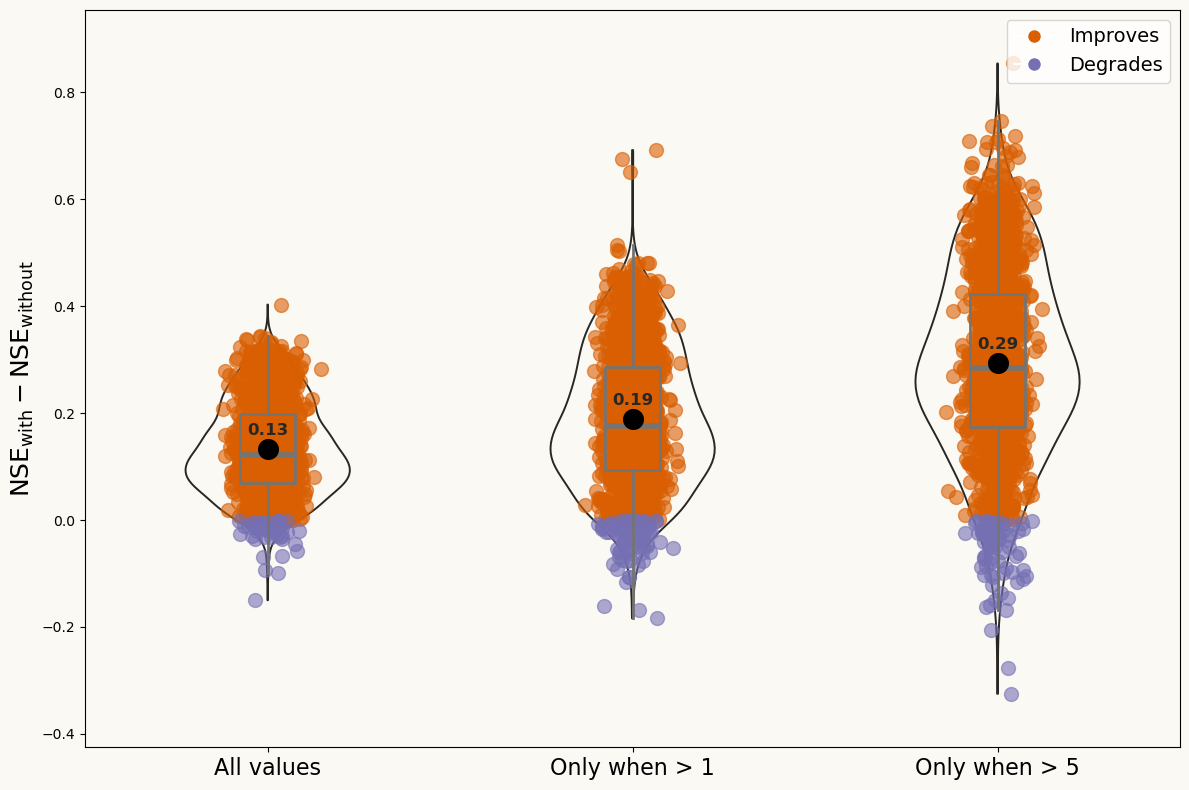

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define colors and layout constants
BG_WHITE = "#fbf9f4"
GREY_DARK = "#747473"
BLACK = "#282724"
COLOR_POSITIVE = "#D95F02"
COLOR_NEGATIVE = "#7570B3"

# Prepare data
datasets = {
    "All": merged_df_original['NSE_difference'].dropna(),
    ">1": merged_df['NSE_difference_gt1'].dropna(),
    ">5": merged_df['NSE_difference_gt5'].dropna()
}

# Set up positions and plot
positions = [1, 2, 3]
labels = list(datasets.keys())

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)

for i, (label, nse_diff) in enumerate(datasets.items()):
    pos = positions[i]
    pos_array = [pos]
    
    # Split data
    positive_values = nse_diff[nse_diff >= 0]
    negative_values = nse_diff[nse_diff < 0]
    num_positive = len(positive_values)
    num_negative = len(negative_values)

    # Jittered points
    x_jittered_positive = np.random.normal(pos, 0.04, size=num_positive)
    x_jittered_negative = np.random.normal(pos, 0.04, size=num_negative)

    # Violin
    violins = ax.violinplot(
        [nse_diff],
        positions=pos_array,
        widths=0.45,
        bw_method="silverman",
        showmeans=False,
        showmedians=False,
        showextrema=False
    )
    for pc in violins["bodies"]:
        pc.set_facecolor("none")
        pc.set_edgecolor(BLACK)
        pc.set_linewidth(1.4)
        pc.set_alpha(1)

    # Boxplot
    medianprops = dict(linewidth=4, color=GREY_DARK, solid_capstyle="butt")
    boxprops = dict(linewidth=2, color=GREY_DARK)
    ax.boxplot(
        [nse_diff],
        positions=pos_array,
        showfliers=False,
        showcaps=False,
        medianprops=medianprops,
        whiskerprops=boxprops,
        boxprops=boxprops
    )

    # Points
    ax.scatter(x_jittered_positive, positive_values, s=100, color=COLOR_POSITIVE, alpha=0.6)
    ax.scatter(x_jittered_negative, negative_values, s=100, color=COLOR_NEGATIVE, alpha=0.6)

    # Mean marker and annotation
    mean_val = np.mean(nse_diff)
    ax.scatter(pos_array, [mean_val], color='black', s=200, zorder=3)
    ax.text(
        pos, mean_val + 0.02,  # Slight offset above the point
        f"{mean_val:.2f}",
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color=BLACK
    )

# Labels & Titles
ax.set_xticks(positions)
ax.set_xticklabels([
    'All values',
    'Only when > 1',
    'Only when > 5'
], size=16)

ax.set_ylabel(r'$\text{NSE}_{\text{with}} - \text{NSE}_{\text{without}}$', size=18, weight='bold')
ax.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', label='Improves', markerfacecolor=COLOR_POSITIVE, markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Degrades', markerfacecolor=COLOR_NEGATIVE, markersize=10)
    ],
    loc="upper right", fontsize=14
)

plt.ylim([
    min(min(d.dropna()) for d in datasets.values()) - 0.1,
    max(max(d.dropna()) for d in datasets.values()) + 0.1
])
plt.tight_layout()
plt.savefig('combined_violin_nse_difference.jpeg', dpi=1200)
plt.show()

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Function to calculate precipitation indices for a single catchment
def calculate_precipitation_indices(series):
    # Initialize a dictionary to store precipitation indices
    indices = {}

    # Total precipitation amount averaged over all days
    indices['avgprcp'] = series.sum(skipna=True) / series.count()

    # Average precipitation amount for rainy days (precipitation > 1 mm)
    rainy_days = series[series > 1]
    indices['avgprcp_rainy'] = rainy_days.mean() if not rainy_days.empty else np.nan

    # Daily precipitation amount corresponding to the 90th percentile
    indices['r90p'] = series.quantile(0.9)

    # Daily precipitation amount corresponding to the 90th percentile of non-zero precipitation
    indices['r90p_1'] = series[series >= 1].quantile(0.90)

    # Daily precipitation amount corresponding to the 95th percentile
    indices['r95p'] = series.quantile(0.95)

    # Daily precipitation amount corresponding to the 95th percentile of non-zero precipitation
    indices['r95p_1'] = series[series >= 1].quantile(0.95)

    # 25th percentile of daily precipitation
    indices['r25p'] = series.quantile(0.25)

    # Maximum 1-day precipitation
    indices['rx1day'] = series.max()

    # Maximum 5-day precipitation
    indices['rx5day'] = series.rolling(window=5, min_periods=1).sum().max()

    # Number of days with precipitation ≥ 10 mm
    indices['r10mm'] = (series >= 10).sum()

    # Number of days with precipitation ≥ 20 mm
    indices['r20mm'] = (series >= 20).sum()

    # Number of wet days (precipitation ≥ 1 mm)
    indices['wetdays'] = (series >= 1).sum()

    # Number of very wet days (≥ 95th percentile of non-zero precipitation days)
    very_wet_threshold = series[series >= 1].quantile(0.95)
    indices['verywetdays'] = (series >= very_wet_threshold).sum()

    # Number of extremely wet days (≥ 99th percentile of non-zero precipitation days)
    extremely_wet_threshold = series[series >= 1].quantile(0.99)
    indices['extremewetdays'] = (series >= extremely_wet_threshold).sum()

    # Calculate RUNAB - Runs above and below the median
    median = series.median()
    series_ab = series.apply(lambda x: 'A' if x > median else 'B')
    runs = (series_ab != series_ab.shift(1)).sum()

    n1 = (series_ab == 'A').sum()
    n2 = (series_ab == 'B').sum()

    if n1 > 20 and n2 > 20:
        mu = (2 * n1 * n2) / (n1 + n2) + 1
        sigma = np.sqrt((2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2) ** 2 * (n1 + n2 - 1)))
        z = abs(runs - mu) / sigma
        indices['RUNAB'] = z
    else:
        indices['RUNAB'] = np.nan  # Set to NaN if not enough data

    # Calculate Spearman lag-1 autocorrelation for ranks
    ranks = series.rank()
    ranks_lag1 = ranks.shift(1)
    valid_idx = ranks_lag1.notna() & ranks.notna()
    spearman_corr, _ = spearmanr(ranks[valid_idx], ranks_lag1[valid_idx])
    indices['spearman_lag1'] = spearman_corr

    return pd.Series(indices)

In [26]:
# Apply the precipitation indices function to each catchment column for y_obs
results_era5 = y_obs.apply(calculate_precipitation_indices, axis=0).T
results_era5['Catchment'] = results_era5.index

# Apply the precipitation indices function to each catchment column for y_sim
results_y_sim = y_sim.apply(calculate_precipitation_indices, axis=0).T
results_y_sim['Catchment'] = results_y_sim.index

# Apply the precipitation indices function to each catchment column for y_sim_no_disch
results_y_sim_no_disch = y_sim_no_disch.apply(calculate_precipitation_indices, axis=0).T
results_y_sim_no_disch['Catchment'] = results_y_sim_no_disch.index

C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\2784419418.py:11: RuntimeWarning: invalid value encountered in scalar divide
  indices['avgprcp'] = series.sum(skipna=True) / series.count()
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\2784419418.py:11: RuntimeWarning: invalid value encountered in scalar divide
  indices['avgprcp'] = series.sum(skipna=True) / series.count()
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\numpy\lib\_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\2784419418.py:11: RuntimeWarning: invalid value encountered in scalar divide
  indices['avgprcp'] = series.sum(skipna=True) / series.count()
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packag

In [27]:
# Rename columns for clarity before merging
results_era5_renamed = results_era5.rename(columns=lambda x: f"era5_{x}")
results_y_sim_renamed = results_y_sim.rename(columns=lambda x: f"y_sim_{x}")
results_y_sim_no_disch_renamed = results_y_sim_no_disch.rename(columns=lambda x: f"y_sim_no_disch_{x}")

# Merge the DataFrames
combined_results = pd.merge(results_era5_renamed, results_y_sim_renamed, left_index=True, right_index=True)
combined_results = pd.merge(combined_results, results_y_sim_no_disch_renamed, left_index=True, right_index=True)

# Reset index if needed, for easier manipulation
combined_results.reset_index(inplace=True)

# Display the merged DataFrame
print(combined_results.head())

          index  era5_avgprcp  era5_avgprcp_rainy  era5_r90p  era5_r90p_1  \
0  GRDC_6140100      1.900694            5.356972       5.90    11.200000   
1  GRDC_6140101      1.862402            5.337427       5.78    11.190001   
2  GRDC_6140120      1.653367            5.146682       5.20    11.147999   
3  GRDC_6140130      2.389578            6.005223       7.35    12.865000   
4  GRDC_6140140      2.345848            6.104165       7.30    12.825000   

   era5_r95p  era5_r95p_1  era5_r25p  era5_rx1day  era5_rx5day  ...  \
0   9.400001    15.700000        0.0    54.900000   141.500001  ...   
1   8.952501    16.165000        0.0    50.074997   128.025000  ...   
2   8.446001    14.812000        0.0    61.680004   102.480004  ...   
3  11.255000    17.157502        0.0    72.900000   157.650000  ...   
4  11.080001    17.950000        0.0    69.300000   145.250000  ...   

   y_sim_no_disch_rx1day  y_sim_no_disch_rx5day  y_sim_no_disch_r10mm  \
0              26.897658             

In [28]:
import geopandas as gpd

# Read the shapefiles
shapefile1 = gpd.read_file(r"C:\Users\ashis\Github\lstm_backward\results\with_discharge_pmean\shapefiles\camelsgb_basin_shapes.shp")
shapefile2 = gpd.read_file(r"C:\Users\ashis\Github\lstm_backward\results\with_discharge_pmean\shapefiles\grdc_basin_shapes.shp")

# Merge the shapefiles
merged = gpd.GeoDataFrame(pd.concat([shapefile1, shapefile2], ignore_index=True))

In [29]:
combined_results

index  era5_avgprcp  era5_avgprcp_rainy  era5_r90p  \
0       GRDC_6140100      1.900694            5.356972   5.900000   
1       GRDC_6140101      1.862402            5.337427   5.780000   
2       GRDC_6140120      1.653367            5.146682   5.200000   
3       GRDC_6140130      2.389578            6.005223   7.350000   
4       GRDC_6140140      2.345848            6.104165   7.300000   
...              ...           ...                 ...        ...   
1795  camelsgb_95001      5.165413            7.759766  13.660001   
1796  camelsgb_96001      2.821345            4.798178   7.450000   
1797  camelsgb_96002      3.594814            5.705169   9.416667   
1798  camelsgb_96004      4.562712            6.899612  11.900000   
1799  camelsgb_97002      2.408327            4.173467   6.150000   

      era5_r90p_1  era5_r95p  era5_r95p_1  era5_r25p  era5_rx1day  \
0       11.200000   9.400001    15.700000        0.0    54.900000   
1       11.190001   8.952501    16.165000        0.0    50.074997   
2       11.147999   8.446001    14.812000        0.0    61.680004   
3       12.865000  11.255000    17.157502        0.0    72.900000   
4       12.825000  11.080001    17.950000        0.0    69.300000   
...           ...        ...          ...        ...          ...   
1795    16.350000  18.500000    21.737500        0.0    69.450000   
1796     9.300000   9.900000    11.932501        0.0    45.250000   
1797    11.795000  12.816669    14.961666        0.0    48.816666   
1798    14.500000  15.805001    18.050000        0.0    53.900000   
1799     7.800000   8.174999    10.300000        0.0    40.150000   

      era5_rx5day  ...  y_sim_no_disch_rx1day  y_sim_no_disch_rx5day  \
0      141.500001  ...              26.897658              65.130051   
1      128.025000  ...              27.070502              64.032246   
2      102.480004  ...              34.284857              67.808244   
3      157.650000  ...              32.144268              79.033824   
4      145.250000  ...              34.778782              75.103518   
...           ...  ...                    ...                    ...   
1795   172.600000  ...              29.603996              75.191817   
1796    94.500002  ...              29.270132              60.546059   
1797   117.249997  ...              27.492068              60.170633   
1798   142.600000  ...              29.528164              65.161710   
1799    83.625001  ...              27.818719              53.839728   

      y_sim_no_disch_r10mm  y_sim_no_disch_r20mm  y_sim_no_disch_wetdays  \
0                    138.0                  11.0                  3015.0   
1                    127.0                  11.0                  2970.0   
2                    130.0                  14.0                  2955.0   
3                    225.0                  24.0                  3240.0   
4                    218.0                  26.0                  3244.0   
...                    ...                   ...                     ...   
1795                 409.0                  16.0                  4401.0   
1796                 112.0                   3.0                  4184.0   
1797                 176.0                   3.0                  4245.0   
1798                 275.0                   9.0                  4337.0   
1799                  73.0                   3.0                  4013.0   

      y_sim_no_disch_verywetdays  y_sim_no_disch_extremewetdays  \
0                          151.0                           31.0   
1                          149.0                           30.0   
2                          148.0                           30.0   
3                          162.0                           33.0   
4                          163.0                           33.0   
...                          ...                            ...   
1795                       221.0                           45.0   
1796                       210.0           

In [30]:
# Ensure the 'gauge_id' column and 'index' column are in the correct type for merging
merged['gauge_id'] = merged['gauge_id'].astype(str)
combined_results['index'] = combined_results['index'].astype(str)

# Merge the GeoDataFrame with the DataFrame
merged = merged.merge(combined_results, left_on='gauge_id', right_on='index', how='left')

# Optionally, drop the 'index' column if it's no longer needed
merged = merged.drop(columns=['index'])

In [31]:
merged

gauge_id                                           geometry  \
0     camelsgb_10002  POLYGON ((-1.83259 57.52677, -1.83343 57.52677...   
1     camelsgb_10003  POLYGON ((-2.08934 57.36359, -2.08933 57.36314...   
2      camelsgb_1001  POLYGON ((-3.26666 58.47607, -3.26665 58.47562...   
3     camelsgb_11001  POLYGON ((-2.1875 57.21841, -2.1875 57.21774, ...   
4     camelsgb_11003  POLYGON ((-2.71701 57.24233, -2.717 57.24211, ...   
...              ...                                                ...   
5760    GRDC_6948120  POLYGON ((8.59583 46.5, 8.6125 46.5, 8.6125 46...   
5761    GRDC_6948150  POLYGON ((9.05833 46.11667, 9.075 46.11667, 9....   
5762    GRDC_6948360  POLYGON ((8.475 46.38333, 8.49583 46.38333, 8....   
5763    GRDC_6948520  POLYGON ((9.16667 46.20417, 9.17917 46.20417, ...   
5764    GRDC_6948530  POLYGON ((7.98333 46.25833, 8.02083 46.25833, ...   

      era5_avgprcp  era5_avgprcp_rainy  era5_r90p  era5_r90p_1  era5_r95p  \
0         2.234605            4.710937   6.266667     9.466666   9.103332   
1         2.248570            4.680057   6.253333     9.283334   9.083333   
2         2.273097            4.054284   5.800000     7.600000   8.000000   
3         2.408689            4.684010   6.520000     9.042728   9.083636   
4         2.508831            4.794154   6.857143     9.314285   9.428572   
...            ...                 ...        ...          ...        ...   
5760      3.838505            8.930014  11.290001    19.898333  17.886668   
5761      3.990491           11.134197  12.250000    26.350000  21.550000   
5762      4.066390            9.472094  12.310000    19.970000  18.255000   
5763      3.873627           11.063050  12.120000    25.100000  20.100000   
5764      3.612320            8.354316  11.150001    17.102500  16.005000   

      era5_r95p_1  era5_r25p  era5_rx1day  ...  y_sim_no_disch_rx1day  \
0       12.983334        0.0    54.033337  ...              21.047840   
1       12.730001        0.0    56.833340  ...              22.258076   
2       10.132500        0.0    43.700000  ...              27.066844   
3       12.661364        0.0    67.554540  ...              26.889985   
4       12.763572        0.0    67.500000  ...              28.057143   
...           ...        ...          ...  ...                    ...   
5760    28.207499        0.0   116.666680  ...              48.247522   
5761    38.150000        0.0   130.250000  ...              49.030444   
5762    27.100000        0.0    98.200000  ...              46.252934   
5763    35.675001        0.0   116.700005  ...              49.009475   
5764    22.158750        0.0    76.975006  ...              42.705715   

      y_sim_no_disch_rx5day  y_sim_no_disch_r10mm  y_sim_no_disch_r20mm  \
0                 43.445410                  52.0                   2.0   
1                 50.866177                  57.0                   4.0   
2                 51.361282                  62.0                   2.0   
3                 71.589092                 114.0                   5.0   
4                 79.230041                 148.0                   7.0   
...                     ...                   ...                   ...   
5760             145.534307                 501.0                 176.0   
5761             136.590538                 487.0                 167.0   
5762             133.487512                 477.0                 136.0   
5763             121.554074                 426.0                 121.0   
5764              96.602503                 391.0                  52.0   

      y_sim_no_disch_wetdays  y_sim_no_disch_verywetdays  \
0                     3617.0                       181.0   
1                     3527.0                       177.0   
2                     3978.0                       199.0   
3                     3549.0                       178.0   
4                     3651.0                       183.0   
...                      ...                    

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.patches import Patch
from matplotlib.collections import PatchCollection

C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cleaned['area'] = gdf_cleaned.geometry.area
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c

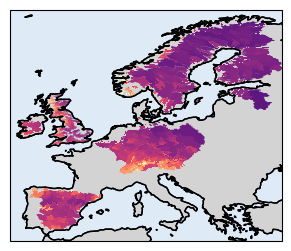

In [33]:
def plot_european_map_polygons_area(gdf, index_column, extent, cmap_color, vmin=None, vmax=None):
    # Clean the GeoDataFrame by dropping rows with missing values in the specified column
    gdf_cleaned = gdf.dropna(subset=[index_column])
    
    # Ensure the GeoDataFrame is in the correct CRS
    if gdf_cleaned.crs != "EPSG:4326":
        gdf_cleaned = gdf_cleaned.to_crs("EPSG:4326")
    
    # Calculate area and add it as a new column for sorting
    gdf_cleaned['area'] = gdf_cleaned.geometry.area
    
    # Sort the GeoDataFrame by area, smallest first
    gdf_cleaned = gdf_cleaned.sort_values(by='area',ascending=False)

    fig = plt.figure(figsize=(4.5, 3))
    # Change the projection to Lambert Conformal Conic for better representation of Europe
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_extent(extent, crs=ccrs.PlateCarree())

    ax.add_feature(cfeature.LAND, color="lightgrey")
    ax.add_feature(cfeature.OCEAN, color='#deebf7')
    ax.add_feature(cfeature.COASTLINE)
    
    # Get the minimum and maximum values of the index column for custom colormap limits
    if vmin is None:
        vmin = gdf_cleaned[index_column].min()
    if vmax is None:
        vmax = gdf_cleaned[index_column].max()
    
    # Create a colormap and normalization
    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_color)
    
    # Plot each polygon, smallest area last (on top)
    for idx, row in gdf_cleaned.iterrows():
        ax.add_geometries([row.geometry], crs=ccrs.PlateCarree(), 
                          facecolor=cmap(norm(row[index_column])), 
                          edgecolor='white', linewidth=0.0001)

    # Create a ScalarMappable and add the colorbar
    #sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    #sm._A = []  # Dummy array for the ScalarMappable
    
    #cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.02, pad=0.04,shrink=0.6, extend='both')
    #cbar.set_label(index_column)

    ax.coastlines()

    plt.savefig(index_column+'.jpeg',dpi=1200)
    plt.show()
    

# Assuming 'merged' is your merged GeoDataFrame and 'index_column' is the column you want to plot
index_column = 'era5_avgprcp_rainy'  # Replace with your actual column name
extent = [-11.5, 32, 35, 72]   # Define the extent for the European map (min_lon, max_lon, min_lat, max_lat)
cmap_color = 'magma'  # Choose a colormap

# Call the function to plot the map
plot_european_map_polygons_area(merged, index_column, extent, cmap_color, vmin=1, vmax=10)

C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cleaned['area'] = gdf_cleaned.geometry.area
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c

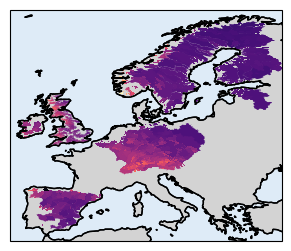

In [34]:
# Specify the index column to plot
index_column = 'y_sim_avgprcp_rainy'  # Replace 'NSE' with the name of your index column

# Plot the world map
plot_european_map_polygons_area(merged, index_column, extent, cmap_color, vmin=1, vmax=10)

C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cleaned['area'] = gdf_cleaned.geometry.area
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c

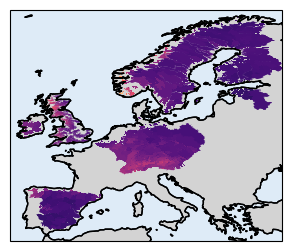

In [35]:
# Specify the index column to plot
index_column = 'y_sim_no_disch_avgprcp_rainy'  # Replace 'NSE' with the name of your index column

# Plot the world map
plot_european_map_polygons_area(merged, index_column, extent, cmap_color, vmin=1, vmax=10)

C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cleaned['area'] = gdf_cleaned.geometry.area
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c

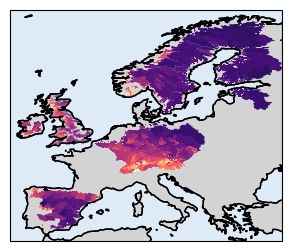

In [36]:
index_column = 'y_sim_r95p_1'
# Plot the world map
plot_european_map_polygons_area(merged, index_column, extent, cmap_color, vmin=4, vmax=22)

C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cleaned['area'] = gdf_cleaned.geometry.area
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c

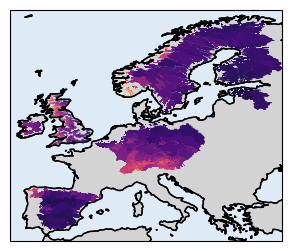

In [37]:
index_column = 'y_sim_no_disch_r95p_1'
# Plot the world map
plot_european_map_polygons_area(merged, index_column, extent, cmap_color, vmin=4, vmax=22)

C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cleaned['area'] = gdf_cleaned.geometry.area
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c

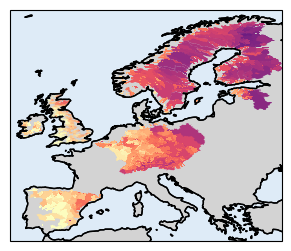

In [38]:
index_column = 'y_sim_spearman_lag1'
plot_european_map_polygons_area(merged, index_column, extent, cmap_color, vmin=0.2, vmax=0.7)

C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_cleaned['area'] = gdf_cleaned.geometry.area
c:\Users\ashis\anaconda3\envs\new_env\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\ashis\AppData\Local\Temp\ipykernel_25936\572008342.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  c

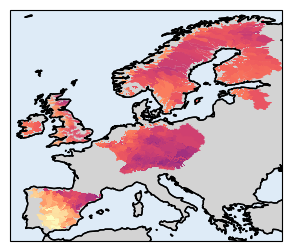

In [39]:
index_column = 'y_sim_no_disch_spearman_lag1'
plot_european_map_polygons_area(merged, index_column, extent, cmap_color, vmin=0.2, vmax=0.7)